In [18]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap, ScalarMappable

In [50]:
path  = "/Users/ivantyshchenko/Projects/Python/DataPatron/data/reddit.csv"
df = pd.read_csv("/Users/ivantyshchenko/Projects/Python/DataPatron/data/filtered_submissions.csv")
df = pd.read_csv("/Users/ivantyshchenko/Projects/Python/DataPatron/data/reddit_metrics.csv")
df

,Unnamed: 0,post_id,post_author,post_created_at,subreddit,title,selftext,post_score,upvote_ratio,num_comments,url,domain,comments_content,comments_scores,Efficiency,UCQS
0,0,1lnl1el,humanlikecorvus,2025-06-29 20:57:14+03:00,UkrainianConflict,JOINT SUBREDDIT FUNDRAISER FOR UKRAINE X UNITED24,"Hello users of r/UkrainianConflict ,\n\nFor th...",104,0.98,6,https://i.redd.it/ik3j60vfmw9f1.png,i.redd.it,['[removed]'\n 'Hi! United24s initial goal of ...,[1 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1],4.67,68.564363
1,1,1met4oq,Distinct-Quit-3223,2025-08-01 13:42:32+03:00,CombatFootage,FPV's of the 14th Operational Assignment Briga...,NaN,349,0.96,9,https://v.redd.it/om1h95v40egf1,/r/CombatFootage/comments/1met4oq/fpvs_of_the_...,['Please keep the [community guidelines](https...,[ 1 1 1 11 29 9 10 1 1 1 1 1 11 29 9 ...,5.67,45.598065
2,2,1metez4,Mil_in_ua,2025-08-01 13:59:17+03:00,UkrainianConflict,Germany to Supply Two Patriot Systems to Ukrai...,NaN,90,0.98,1,https://militarnyi.com/en/news/germany-to-supp...,militarnyi.com,"[""Please take the time to read [the rules](/r/...",[1 1],4.44,19.130711
3,3,1mevbmj,UNITED24Media,2025-08-01 15:35:50+03:00,UkrainianConflict,"Ukraine Pushes East in Donetsk Region, Forcing...",NaN,145,0.99,3,https://united24media.com/latest-news/ukraine-...,united24media.com,"[""Please take the time to read [the rules](/r/...",[1 2 3 1 2 3],4.97,18.928176
4,4,1mevf5c,Pristine_Squirrel_27,2025-08-01 15:40:20+03:00,UkrainianConflict,Germany to deliver two Patriot systems to Ukra...,NaN,206,1.00,2,https://www.reuters.com/world/europe/germany-d...,reuters.com,"[""Please take the time to read [the rules](/r/...",[ 1 10 1 10],5.35,19.306966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,3697,1lfftln,Econ_Orc,2025-06-19 19:55:02+03:00,europe,Denmark to push for Ukraines EU membership dur...,NaN,1221,0.97,61,https://www.reuters.com/sustainability/climate...,reuters.com,NaN,NaN,6.99,50.000000
3698,3698,1lfqv6t,SpecialK_Anon,2025-06-20 03:45:54+03:00,ukraine,I wrote this letter to my representatives in c...,**Find your representatives here:** [**https:/...,96,1.00,1,https://www.reddit.com/r/ukraine/comments/1lfq...,self.ukraine,NaN,NaN,4.60,50.000000
3699,3699,1lgwjya,HellYeahDamnWrite,2025-06-21 16:27:17+03:00,UkrainianConflict,Putin declares ‘all of Ukraine is ours’ in lat...,NaN,253,0.95,41,https://www.independent.co.uk/news/world/europ...,independent.co.uk,NaN,NaN,5.53,50.000000
3700,3700,1lj5jqe,BezugssystemCH1903,2025-06-24 11:20:01+03:00,de,Sichere ukrainische Gebiete - Schweiz schränkt...,NaN,27,0.89,0,https://www.srf.ch/news/schweiz/sichere-ukrain...,srf.ch,NaN,NaN,2.97,50.000000


/var/folders/ks/d6pwjtjd5y7_9mmxkttk6rd00000gn/T/ipykernel_60486/2787697235.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap("inferno")


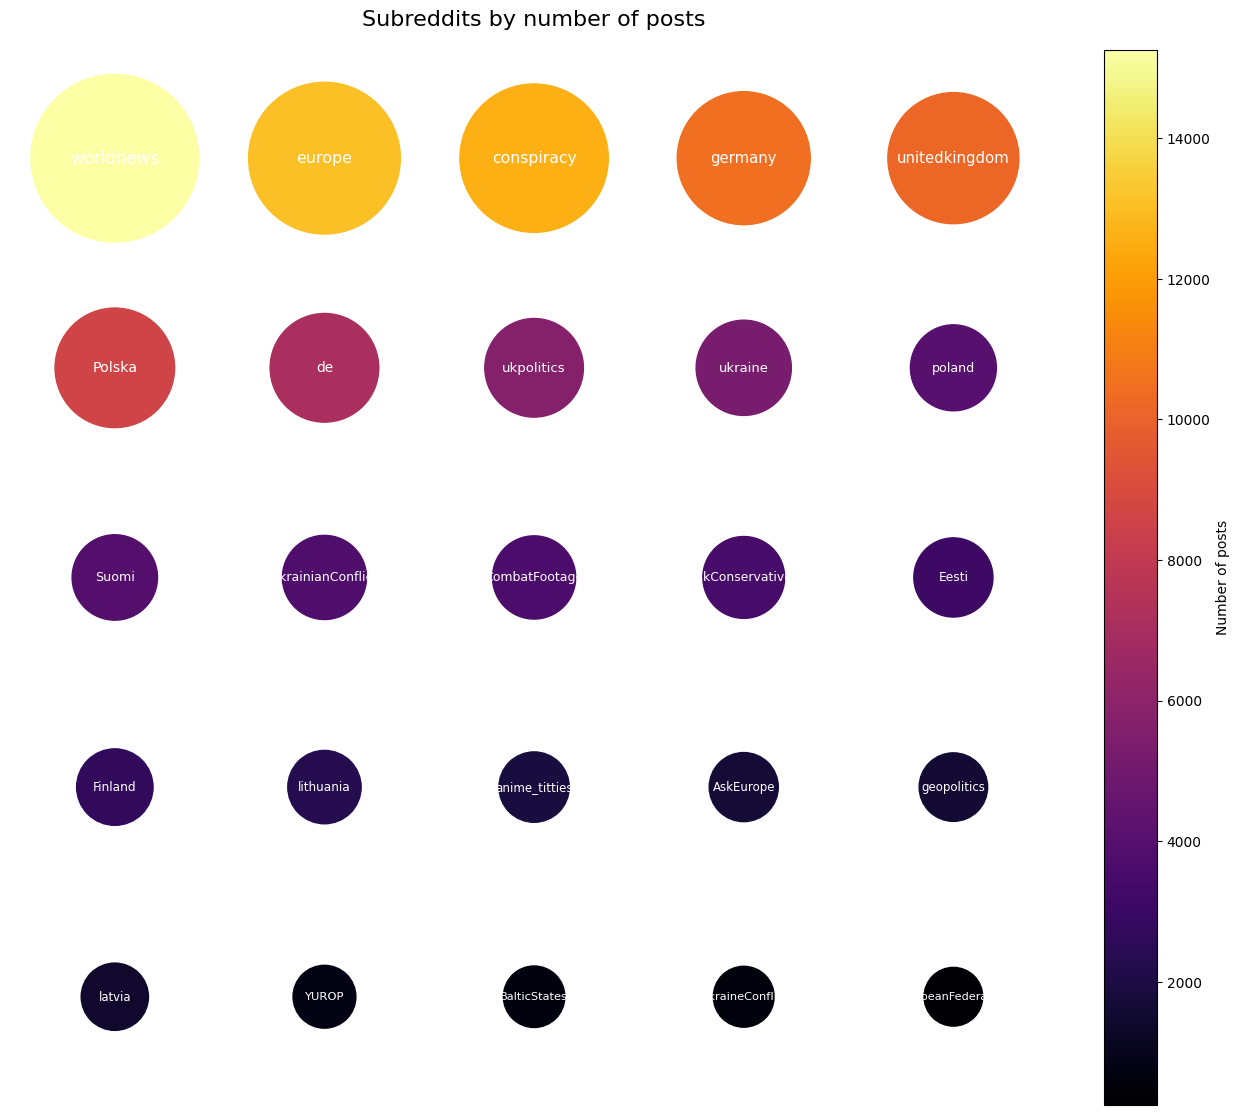

In [48]:
# Fix optional empty index column
if "" in df.columns:
    df = df.rename(columns={"": "row_id"})
elif "Unnamed: 0" in df.columns:
    df = df.rename(columns={"Unnamed: 0": "row_id"})

# 2. Aggregate: number of posts per subreddit
sub_counts = (
    df.groupby("subreddit")
      .size()
      .reset_index(name="count")
)

# Take top N subreddits so labels stay readable
N = 25
sub_counts = (
    sub_counts
    .sort_values("count", ascending=False)
    .head(N)
    .reset_index(drop=True)
)

# 3. Grid layout (no overlaps)
n_items = len(sub_counts)
n_cols = math.ceil(math.sqrt(n_items))
n_rows = math.ceil(n_items / n_cols)

# Normalize counts for radius and color
counts = sub_counts["count"].values
norm = Normalize(vmin=counts.min(), vmax=counts.max())
cmap = get_cmap("inferno")

# Radius scaling inside each grid cell
cell_size = 1.0              # one cell = 1x1 in data coords
max_radius = cell_size * 0.40  # max radius so circles don't touch
min_scale = 0.35               # min relative size so маленькі не зникають

counts_norm01 = (counts - counts.min()) / (counts.max() - counts.min() + 1e-9)
radius_scales = min_scale + counts_norm01 * (1.0 - min_scale)
radii = max_radius * radius_scales

# 4. Plot
fig_w = n_cols * 2.5
fig_h = n_rows * 2.5
fig, ax = plt.subplots(figsize=(fig_w, fig_h))

for idx, row in sub_counts.iterrows():
    r = radii[idx]
    c = row["count"]
    name = row["subreddit"]

    row_idx = idx // n_cols
    col_idx = idx % n_cols

    # center of this bubble
    x = col_idx + 0.5
    y = n_rows - row_idx - 0.5   # flip vertically so читається як таблиця

    color = cmap(norm(c))

    circle = plt.Circle((x, y), r, color=color)
    ax.add_patch(circle)

    # text inside bubble
    # font size трохи залежить від радіуса
    fs = 6 + r * 15
    ax.text(
        x, y,
        name,
        ha="center",
        va="center",
        color="white",
        fontsize=fs,
        wrap=True
    )

# Beautify
ax.set_xlim(0, n_cols)
ax.set_ylim(0, n_rows)
ax.set_aspect("equal")
ax.axis("off")
ax.set_title("Subreddits by number of posts", fontsize=16, pad=20)

# Colorbar for counts
sm = ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Number of posts")

plt.tight_layout()
plt.show()

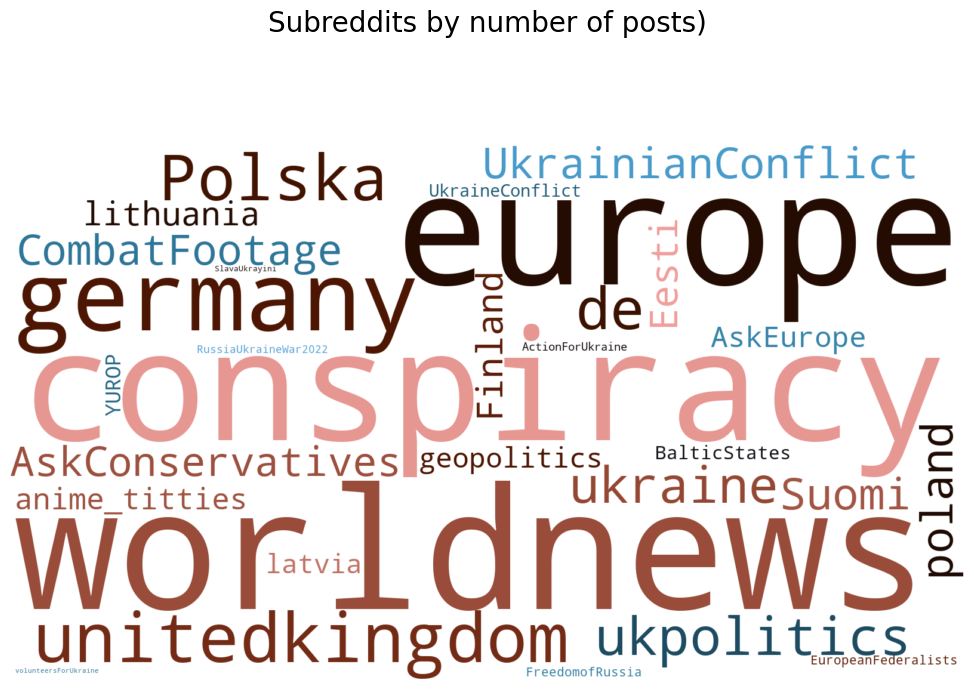

In [49]:
from wordcloud import WordCloud
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

if "" in df.columns:
    df = df.rename(columns={"": "row_id"})
elif "Unnamed: 0" in df.columns:
    df = df.rename(columns={"Unnamed: 0": "row_id"})

# 2. Aggregate: number of posts per subreddit
sub_counts = (
    df.groupby("subreddit")
      .size()
      .reset_index(name="count")
)

# Optionally keep only top N subreddits
N = 300
sub_counts = (
    sub_counts
    .sort_values("count", ascending=False)
    .head(N)
)

# 3. Build frequency dict for WordCloud
freq = dict(zip(sub_counts["subreddit"], sub_counts["count"]))

# 4. Create wordcloud
wc = WordCloud(
    width=1600,
    height=900,
    background_color="white",
    colormap="berlin",     # heatmap-like colors
    prefer_horizontal=0.8,
    max_words=N,
    min_font_size=8,
    margin=1,
).generate_from_frequencies(freq)

# 5. Plot
plt.figure(figsize=(14, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Subreddits by number of posts)", fontsize=20, pad=80)
plt.tight_layout()
plt.show()